In [1]:
import pandas as pd

In [41]:
val_result = pd.read_csv("val_result.csv")


In [42]:
val_result

,label,prediction
0,"tensor([0], dtype=torch.int32)",tensor([0.1028])
1,"tensor([1], dtype=torch.int32)",tensor([0.1140])
2,"tensor([0], dtype=torch.int32)",tensor([0.1479])
3,"tensor([1], dtype=torch.int32)",tensor([0.7371])
4,"tensor([1], dtype=torch.int32)",tensor([0.4863])
...,...,...
5480,"tensor([0], dtype=torch.int32)",tensor([0.9659])
5481,"tensor([0], dtype=torch.int32)",tensor([0.4273])
5482,"tensor([0], dtype=torch.int32)",tensor([0.9085])
5483,"tensor([1], dtype=torch.int32)",tensor([0.0205])


In [43]:
labels = []
for index, row in val_result.iterrows():
    label = row['label'].split('[')[1].split(']')[0]
    labels.append(int(label))

In [44]:
len(labels)

5485

In [45]:
predictions = []
for index, row in val_result.iterrows():
    prediction = row['prediction'].split('[')[1].split(']')[0]
    predictions.append(float(prediction))

In [46]:
val_result["predictions"] = predictions

In [47]:
val_result["labels"] = labels

In [48]:
val_result

,label,prediction,predictions,labels
0,"tensor([0], dtype=torch.int32)",tensor([0.1028]),0.1028,0
1,"tensor([1], dtype=torch.int32)",tensor([0.1140]),0.1140,1
2,"tensor([0], dtype=torch.int32)",tensor([0.1479]),0.1479,0
3,"tensor([1], dtype=torch.int32)",tensor([0.7371]),0.7371,1
4,"tensor([1], dtype=torch.int32)",tensor([0.4863]),0.4863,1
...,...,...,...,...
5480,"tensor([0], dtype=torch.int32)",tensor([0.9659]),0.9659,0
5481,"tensor([0], dtype=torch.int32)",tensor([0.4273]),0.4273,0
5482,"tensor([0], dtype=torch.int32)",tensor([0.9085]),0.9085,0
5483,"tensor([1], dtype=torch.int32)",tensor([0.0205]),0.0205,1


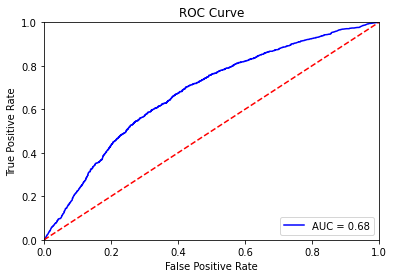

In [49]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


fpr, tpr, threshold = metrics.roc_curve(labels, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
import numpy as np

def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [51]:
threshold = Find_Optimal_Cutoff(labels, predictions)

In [52]:
threshold

[0.5364]

In [53]:
from sklearn.metrics import classification_report

results = []
for i in predictions:
  if i >= threshold[0]:
    results.append(1)
  else:
    results.append(0)
print(classification_report(labels, results))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71      3905
           1       0.41      0.63      0.50      1580

    accuracy                           0.63      5485
   macro avg       0.61      0.63      0.60      5485
weighted avg       0.70      0.63      0.65      5485

